In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [10]:
# Create a reference the CSV file desired
adverse_path = "../Resources/VAERSDATA1 (3).csv"

# Read the CSV into a Pandas DataFrame
adverse = pd.read_csv(adverse_path, low_memory=False)

# Print the first five rows of data to the screen
adverse.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES
0,1021156,2/10/2021,IL,32,F,NaN,NaN,N,1/27/2021,2/4/2021,8.0,SEN,MODERNA,NaN,Nka
1,1029567,2/14/2021,NH,61,M,NaN,NaN,U,2/14/2021,2/14/2021,0.0,PUB,MODERNA,NaN,NaN
2,1061353,2/28/2021,WA,74,M,NaN,NaN,N,2/24/2021,2/24/2021,0.0,PUB,PFIZER\BIONTECH,NaN,sulfa based products
3,1066793,3/2/2021,AZ,81,M,NaN,NaN,N,2/12/2021,2/26/2021,14.0,PUB,PFIZER\BIONTECH,NaN,NaN
4,1219181,4/16/2021,TX,15,M,NaN,NaN,Y,4/15/2021,4/15/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN


In [11]:
# creating bins
bins = list(range(0, 111, 10))
labels=[f"{i}-{i+9}" for i in range(0,110,10)]
adverse.loc[:,"Age_Group"]=pd.cut(adverse["AGE_YRS"],bins=bins,labels=labels,right=False)
adverse.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES,Age_Group
0,1021156,2/10/2021,IL,32,F,NaN,NaN,N,1/27/2021,2/4/2021,8.0,SEN,MODERNA,NaN,Nka,30-39
1,1029567,2/14/2021,NH,61,M,NaN,NaN,U,2/14/2021,2/14/2021,0.0,PUB,MODERNA,NaN,NaN,60-69
2,1061353,2/28/2021,WA,74,M,NaN,NaN,N,2/24/2021,2/24/2021,0.0,PUB,PFIZER\BIONTECH,NaN,sulfa based products,70-79
3,1066793,3/2/2021,AZ,81,M,NaN,NaN,N,2/12/2021,2/26/2021,14.0,PUB,PFIZER\BIONTECH,NaN,NaN,80-89
4,1219181,4/16/2021,TX,15,M,NaN,NaN,Y,4/15/2021,4/15/2021,0.0,PVT,PFIZER\BIONTECH,NaN,NaN,10-19


Age_Group
0-9         17065
10-19       54290
20-29       83451
30-39      130913
40-49      134562
50-59      149071
60-69      157615
70-79      114217
80-89       44466
90-99       10499
100-109       380
Name: count, dtype: int64


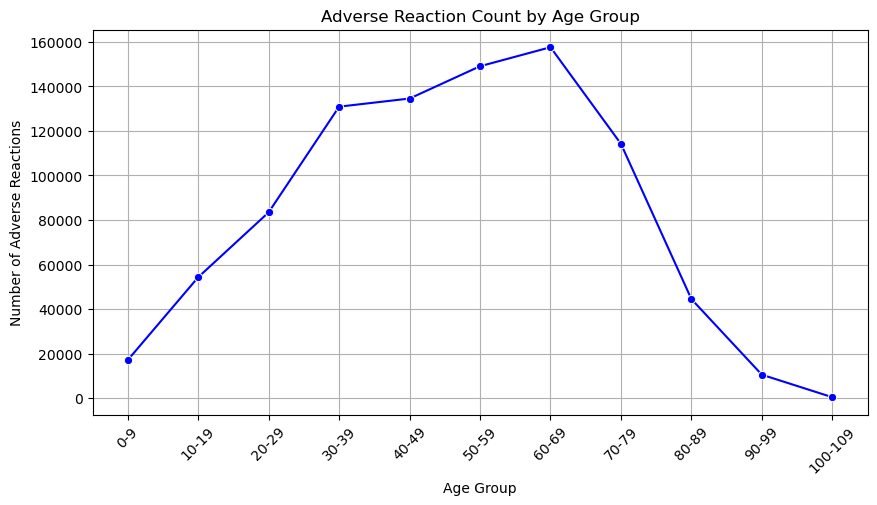

In [12]:
# Display count of deaths per age group
age_group_adverse_counts = adverse["Age_Group"].value_counts().sort_index()
print(age_group_adverse_counts)

# Plot the age distribution of deaths as a line graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=age_group_adverse_counts.index, y=age_group_adverse_counts.values, marker="o", linestyle="-", color="b")

# Formatting the graph
plt.xlabel("Age Group")
plt.ylabel("Number of Adverse Reactions")
plt.title("Adverse Reaction Count by Age Group")
plt.xticks(rotation=45)
plt.grid(True)

In [13]:
# Extract records for male and female
died_records = adverse[adverse["DIED"] == "Y"]

died_records.head()


,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES,Age_Group
32,1261766,4/27/2021,FL,1,M,Y,4/10/2021,N,4/8/2021,4/10/2021,2.0,UNK,MODERNA,NaN,NaN,0-9
152,2639957,6/1/2023,WI,1,M,Y,4/29/2023,N,4/7/2023,4/29/2023,22.0,PVT,MODERNA,NaN,NaN,0-9
1097,2506670,11/12/2022,MA,1,M,Y,10/7/2022,N,8/10/2022,10/7/2022,58.0,PVT,MODERNA,N/a,N/a,0-9
1664,2536846,12/19/2022,NH,2,F,Y,12/16/2022,N,12/15/2022,12/16/2022,1.0,PVT,MODERNA,Unknown,Unknown,0-9
4908,1890705,11/22/2021,IA,5,F,Y,11/22/2021,N,11/18/2021,11/22/2021,4.0,PVT,PFIZER\BIONTECH,"PMH of twin to twin transfusion born at erm, n...",none known,0-9


Age_Group
0-9          14
10-19        82
20-29       170
30-39       301
40-49       552
50-59      1324
60-69      3142
70-79      4803
80-89      4470
90-99      1935
100-109     113
Name: count, dtype: int64


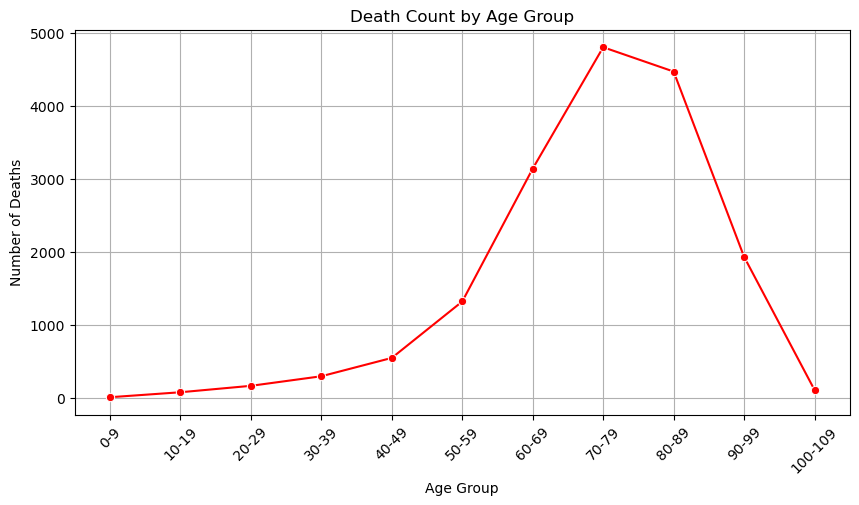

In [15]:
# Display count of deaths per age group
age_group_death_counts = died_records["Age_Group"].value_counts().sort_index()
print(age_group_death_counts)

# Plot the age distribution of deaths as a line graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=age_group_death_counts.index, y=age_group_death_counts.values, marker="o", linestyle="-", color="r")

# Formatting the graph
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths")
plt.title("Death Count by Age Group")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

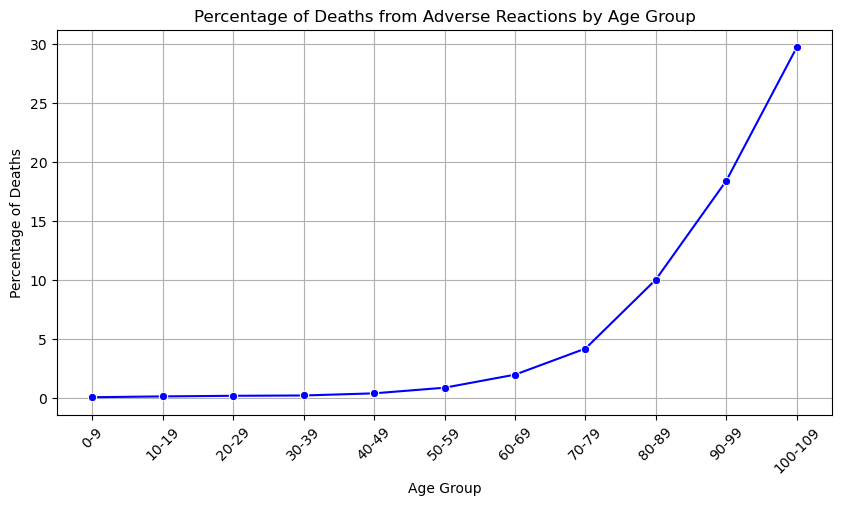

In [16]:
# Calculate percentage of deaths per age group
death_percent = (age_group_death_counts/age_group_adverse_counts)*100

# Plot the age distribution of deaths as a line graph
plt.figure(figsize=(10, 5))
sns.lineplot(x=death_percent.index, y=death_percent.values, marker="o", linestyle="-", color="b")

# Formatting the graph
plt.xlabel("Age Group")
plt.ylabel("Percentage of Deaths")
plt.title("Percentage of Deaths from Adverse Reactions by Age Group")
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()